In [0]:
# This file is for training neural networks using keras from tensorflow backend in Python. Google Colab allows me to use GPU insteading of CPU, which can significantly save lots of training time.
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import KFold, cross_validate, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'/content'

In [0]:
train_cleaned = pd.read_csv("train_data_cleaned.csv") # read file, clean file
test_cleaned = pd.read_csv("test_data_cleaned.csv")
train_cleaned = train_cleaned.drop(columns = ["Unnamed: 0", "ingredients", "total_ingre"], axis = 1)
test_cleaned = test_cleaned.drop(columns = ["Unnamed: 0", "ingredients"], axis = 1)

In [5]:
train_cleaned.head()

,cuisine,id,features
0,greek,10259,romaine lettuce black olive grape tomato garli...
1,southern_us,25693,plain flour ground pepper salt tomato ground b...
2,filipino,20130,egg pepper salt mayonaise cooking oil green ch...
3,indian,22213,water vegetable oil wheat salt
4,indian,13162,black pepper shallot cornflour cayenne pepper ...


In [6]:
test_cleaned.head()

,id,features
0,18009,baking powder egg all purpose flour raisin mil...
1,28583,sugar egg yolk corn starch cream of tartar ban...
2,41580,sausage link fennel bulb frond olive oil cuban...
3,29752,meat cut file powder smoked sausage okra shrim...
4,35687,ground black pepper salt sausage casing leek p...


In [0]:
vectorized = TfidfVectorizer(stop_words = "english",binary = True) # perform TF-IDF transformation, no need to use SVD for dimension reduction since I use GPU.
train_vect = vectorized.fit_transform(train_cleaned["features"].values)
train_vect.sort_indices()
test_vect = vectorized.transform(test_cleaned["features"].values)
test_vect.sort_indices()
label_encoder = LabelEncoder()
train_label = label_encoder.fit_transform(train_cleaned["cuisine"].values)

In [30]:
train_vect.shape, test_vect.shape, train_label.shape

((39751, 2735), (9944, 2735), (39751,))

In [0]:
label_nn = keras.utils.to_categorical(train_label) # change labels to categorical for keras

In [10]:
label_nn[:20]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(train_vect, label_nn, test_size = 0.20, random_state = 0) # split training dataset to training and validating datestes  

In [0]:
model = keras.Sequential()
model.add(keras.layers.Dense(2000, kernel_initializer = keras.initializers.he_normal(seed=0), activation='relu', input_dim=2735)) # input dimension is the number of columns that after TF-IDF transformation give me
model.add(keras.layers.Dropout(0.80))  # set dropout to 0.80, which means drop out 80% of data for every epoch, prevent overfitting 
model.add(keras.layers.Dense(1024, kernel_initializer = keras.initializers.he_normal(seed=0), activation='relu')) 
model.add(keras.layers.Dropout(0.50)) #0.5
model.add(keras.layers.Dense(256, kernel_initializer = keras.initializers.he_normal(seed=1), activation='relu'))
model.add(keras.layers.Dropout(0.60))#0.6
#model.add(keras.layers.Dense(40, kernel_initializer=keras.initializers.he_normal(seed=2), activation='relu'))
#model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.Dense(20, kernel_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=3), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
keras_fit = model.fit(X_train, y_train, epochs=15, batch_size=512, validation_data=(X_valid, y_valid)) # epoch = 20
print("Finished")

Epoch 1/15
63/63 [==============================] - 1s 11ms/step - loss: 2.0796 - accuracy: 0.3939 - val_loss: 1.3445 - val_accuracy: 0.5819
Epoch 2/15
63/63 [==============================] - 1s 8ms/step - loss: 1.2197 - accuracy: 0.6350 - val_loss: 0.9586 - val_accuracy: 0.7039
Epoch 3/15
63/63 [==============================] - 1s 8ms/step - loss: 0.9777 - accuracy: 0.7032 - val_loss: 0.8626 - val_accuracy: 0.7346
Epoch 4/15
63/63 [==============================] - 1s 8ms/step - loss: 0.8533 - accuracy: 0.7445 - val_loss: 0.7869 - val_accuracy: 0.7662
Epoch 5/15
63/63 [==============================] - 1s 8ms/step - loss: 0.7591 - accuracy: 0.7751 - val_loss: 0.7539 - val_accuracy: 0.7742
Epoch 6/15
63/63 [==============================] - 1s 9ms/step - loss: 0.6900 - accuracy: 0.7959 - val_loss: 0.7381 - val_accuracy: 0.7861
Epoch 7/15
63/63 [==============================] - 1s 8ms/step - loss: 0.6366 - accuracy: 0.8113 - val_loss: 0.7220 - val_accuracy: 0.7891
Epoch 8/15
63/63 [=

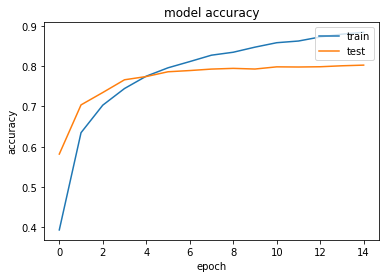

In [117]:
plt.plot(keras_fit.history['accuracy'])
plt.plot(keras_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [123]:
keras_fit = model.fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_valid, y_valid)) # epoch = 20 # epoch 25 is enough, 30 epoches will result in slightly overfitting
print("Finished")

Epoch 1/30
63/63 [==============================] - 1s 9ms/step - loss: 0.1446 - accuracy: 0.9556 - val_loss: 0.9831 - val_accuracy: 0.8029
Epoch 2/30
63/63 [==============================] - 1s 8ms/step - loss: 0.1394 - accuracy: 0.9561 - val_loss: 0.9965 - val_accuracy: 0.8043
Epoch 3/30
63/63 [==============================] - 1s 8ms/step - loss: 0.1344 - accuracy: 0.9574 - val_loss: 1.0242 - val_accuracy: 0.8015
Epoch 4/30
63/63 [==============================] - 1s 8ms/step - loss: 0.1328 - accuracy: 0.9570 - val_loss: 1.0171 - val_accuracy: 0.8028
Epoch 5/30
63/63 [==============================] - 1s 8ms/step - loss: 0.1264 - accuracy: 0.9604 - val_loss: 1.0394 - val_accuracy: 0.8020
Epoch 6/30
63/63 [==============================] - 1s 8ms/step - loss: 0.1259 - accuracy: 0.9608 - val_loss: 1.0521 - val_accuracy: 0.8019
Epoch 7/30
63/63 [==============================] - 1s 8ms/step - loss: 0.1242 - accuracy: 0.9616 - val_loss: 1.0537 - val_accuracy: 0.8039
Epoch 8/30
63/63 [==

In [126]:
print(keras_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [124]:
y_pred = model.predict(test_vect)
predictions = label_encoder.inverse_transform([np.argmax(pred) for pred in y_pred]) # change label from integer array back to string
predictions[:20]

array(['irish', 'southern_us', 'italian', 'cajun_creole', 'italian',
       'southern_us', 'french', 'chinese', 'mexican', 'british',
       'italian', 'greek', 'indian', 'italian', 'british', 'french',
       'mexican', 'french', 'mexican', 'southern_us'], dtype=object)

In [0]:
test_id = test_cleaned["id"]
sub = pd.DataFrame({'id': test_id, 'cuisine': predictions}, columns=['id', 'cuisine']) # write tp csv
sub.to_csv('sub_keras7.csv', index=False)